# About The Dataset

Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections.

This data set includes 274 instances of countries, including their province/state, their location (latitude and longitude) and the dates.

Here is what the data is being described:
- Province/State: The name of the region of the country, otherwise known as a territory. The name of states within the United States
- Country/Region: Name of each country/region.
- Lat: The measurement of distance north or south of the Equator
- Long: The measurement east or west of the prime meridian
- Dates: Represents on the count of cases being recorded for each day.

***

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from fbprophet import Prophet

***

# Importing Data

In [2]:
covid = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

print('This is the covid dataset:\n' + str(covid.head()) + '\n')
print('This is the county dataset:\n' + str(county.head()))

This is the covid dataset:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/20/21  2/21/21  2/22/21  \
0        0        0        0        0  ...    55580    55604    55617   
1        0        0        0        0  ...    99062   100246   101285   
2        0        0        0        0  ...   111764   111917   112094   
3        0        0        0        0  ...    10672    10699    10712   
4        0        0        0        0  ...    20499    20519    20548   

   2/23/21  2/24/21  2/25/21  2/26/21  2/27/21  2/28/21  3/1/21  
0    55646    55664    

In [3]:
print('This dataset has ' + str(covid.shape[0]) + ' rows and ' + str(covid.shape[1]) + ' columns.')
print('This dataset has ' + str(county.shape[0]) + ' rows and ' + str(county.shape[1]) + ' columns.')

This dataset has 274 rows and 409 columns.
This dataset has 1079469 rows and 6 columns.


As we can see from above, there is about 408 columns to work with. Which is pretty neat if we wanted to display a visualization graph for a specific day during the pandemic, but I would prefer to have it in a long table than a wide table since it would be easier to see the data as a whole.

In [4]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,273.0,20.534804,2.519459e+01,-51.7963,5.152149,21.6940,41.1129,7.170690e+01
Long,273.0,23.028143,7.359617e+01,-178.1165,-19.020800,20.9394,84.2500,1.780650e+02
1/22/20,274.0,2.032847,2.687910e+01,0.0000,0.000000,0.0000,0.0000,4.440000e+02
1/23/20,274.0,2.390511,2.697708e+01,0.0000,0.000000,0.0000,0.0000,4.440000e+02
1/24/20,274.0,3.434307,3.358524e+01,0.0000,0.000000,0.0000,0.0000,5.490000e+02
...,...,...,...,...,...,...,...,...
2/25/21,274.0,412413.912409,2.015144e+06,0.0000,956.500000,12862.0000,170481.0000,2.841339e+07
2/26/21,274.0,414030.558394,2.021213e+06,0.0000,957.500000,12862.0000,170860.2500,2.849018e+07
2/27/21,274.0,415449.489051,2.026505e+06,0.0000,960.500000,12869.0000,171283.2500,2.855447e+07
2/28/21,274.0,416556.047445,2.030505e+06,0.0000,961.250000,12869.0000,171619.5000,2.860567e+07


In [5]:
county.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,1069551.0,31300.088230,16308.101837,1001.0,19005.0,29223.0,46102.0,78030.0
cases,1079469.0,3019.594384,16184.540133,0.0,57.0,379.0,1589.0,1193531.0
deaths,1056028.0,68.800948,501.359629,0.0,1.0,7.0,32.0,29408.0


***

# Preprocessing

### Data Reshaping

Since the main goal is to visualize the data as a whole we would prefer to have it in a long table. In order to do that, we would use the `df.melt()` function for us to get what we desire, which is to have it in a long table.

In [6]:
covid = covid.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                   var_name = 'Date',
                   value_name = 'Cases')
covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [7]:
covid.shape

(110970, 6)

Perfect! Now we have reduced the data set from 408 columns to 6 columns, as well with the rows where we went from 274 instances to more than 100,000 instances. Which is quite simple to handle and easier to work with for this analysis. Now let us proceed to inspecting the data types that we are working with for this data set.

In [8]:
print((covid.isnull().sum() / len(covid)) * 100)
print('\n' + str(county.isnull().sum() / len(county) * 100))

Province/State    68.978102
Country/Region     0.000000
Lat                0.364964
Long               0.364964
Date               0.000000
Cases              0.000000
dtype: float64

date      0.000000
county    0.000000
state     0.000000
fips      0.918785
cases     0.000000
deaths    2.171531
dtype: float64


This is great news, we do not have to worry about doing data imputation with this data set since we are mainly using three variables which are `Country/State`, `Date`, `Cases` and possibly `Province/State` if we wanted to filter for a specific province/state in a country. 

Same for the County data set, we don't have to worry about doing any data imputation.

In [9]:
print(str(covid.info()) + '\n')
print('\n' + str(county.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110970 entries, 0 to 110969
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  34425 non-null   object 
 1   Country/Region  110970 non-null  object 
 2   Lat             110565 non-null  float64
 3   Long            110565 non-null  float64
 4   Date            110970 non-null  object 
 5   Cases           110970 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 5.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079469 entries, 0 to 1079468
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1079469 non-null  object 
 1   county  1079469 non-null  object 
 2   state   1079469 non-null  object 
 3   fips    1069551 non-null  float64
 4   cases   1079469 non-null  int64  
 5   deaths  1056028 non-null  float64
dtypes: float64(2), int64(1), 

As we can observe from the table above, most of its columns seem to have the correct data type, except for the `Date` column which is not much of an issue since we can easily change in the next section of the `Preprocessing` section.

### Drop unnecessary columns

In [10]:
covid = covid.drop(['Lat', 'Long'], axis = 1)

In [11]:
covid

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
110965,NaN,Vietnam,3/1/21,2448
110966,NaN,West Bank and Gaza,3/1/21,185336
110967,NaN,Yemen,3/1/21,2310
110968,NaN,Zambia,3/1/21,79002


In [12]:
county = county.drop(['fips'], axis = 1)

In [13]:
county

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
1079464,2021-03-01,Sweetwater,Wyoming,3772,34.0
1079465,2021-03-01,Teton,Wyoming,3357,9.0
1079466,2021-03-01,Uinta,Wyoming,2055,12.0
1079467,2021-03-01,Washakie,Wyoming,882,26.0


### Converting from `str` to `datetime` data type

In [14]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [15]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110970 entries, 0 to 110969
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  34425 non-null   object        
 1   Country/Region  110970 non-null  object        
 2   Date            110970 non-null  datetime64[ns]
 3   Cases           110970 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4+ MB


In [16]:
county['date'] = pd.to_datetime(county['date'])

In [17]:
county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079469 entries, 0 to 1079468
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1079469 non-null  datetime64[ns]
 1   county  1079469 non-null  object        
 2   state   1079469 non-null  object        
 3   cases   1079469 non-null  int64         
 4   deaths  1056028 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.2+ MB


### Creating `Daily Cases` column

In [18]:
covid['Daily Cases'] = (covid.groupby(by = ['Country/Region'])['Cases']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

In [19]:
covid[covid['Country/Region'] == 'US'].head(5)

,Province/State,Country/Region,Date,Cases,Daily Cases
249,NaN,US,2020-01-22,1,0
523,NaN,US,2020-01-23,1,0
797,NaN,US,2020-01-24,2,1
1071,NaN,US,2020-01-25,2,0
1345,NaN,US,2020-01-26,5,3


In [20]:
county['Daily Cases'] = (county.groupby(by = ['county', 'state'])['cases']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

### Creating `Daily Deaths` column

In [21]:
county['Daily Deaths'] = (county.groupby(by = ['county', 'state'])['deaths']
                        .diff()
                        .fillna(0)
                        .astype(dtype = np.int32))

### Creating `County State` column

In [22]:
county['County State'] = county['county'] + ', ' + county['state']
county[['County State']]

,County State
0,"Snohomish, Washington"
1,"Snohomish, Washington"
2,"Snohomish, Washington"
3,"Cook, Illinois"
4,"Snohomish, Washington"
...,...
1079464,"Sweetwater, Wyoming"
1079465,"Teton, Wyoming"
1079466,"Uinta, Wyoming"
1079467,"Washakie, Wyoming"


***

# Exploratory Data Analysis

Now I am quite satisfied with the data and it is ready to be visualized. Even though, I will be creating some basic plots it is still worth trying to see what interesting findings I could find within the graphs. There is a few things that I would like to know such as: 
- Time Series of Daily Cases in the United States
- Time Series of Daily Cases/Deaths in Harris County, Texas
- The Top 10 Number of Cases/Deaths of Counties in Texas
- The Top 10 Number of Cases/Deaths of States in the United States
- Forcasting the Future for the United States and Harris County, Texas

### Time Series of Daily Cases in the United States

Even though we have more than 100,000 instances within the `covid` dataset I would like to specifically *only* look at the United States. So, first, I will narrow down the data set where it is quite feasible to work with. Luckily, since we have the `Daily Cases` this would be perfect for our time series where it would display on how many cases appeared on a specific day in the graph. If we did not do just that we would have obtained a cumulative sum of the cases for the United States which is something that we are not looking for. But, unfortunately the `covid` data set did not have any data about the deaths for each country. So, please bear with me. 

Interestingly enough, as we were about to enter into a new year we have quadrapuled our cases! Which is crazy! We could assume this was the time where people were quite depraved of social interaction and wanting to go visit friends and/or family during the holidays despite the consequences leading to numbers displayed in the graph.

In [23]:
us_covid = (covid[(covid['Country/Region'] == 'US')]
            .reset_index(drop = True)
            .drop(['Province/State'], axis = 1))
us_covid.head()

,Country/Region,Date,Cases,Daily Cases
0,US,2020-01-22,1,0
1,US,2020-01-23,1,0
2,US,2020-01-24,2,1
3,US,2020-01-25,2,0
4,US,2020-01-26,5,3


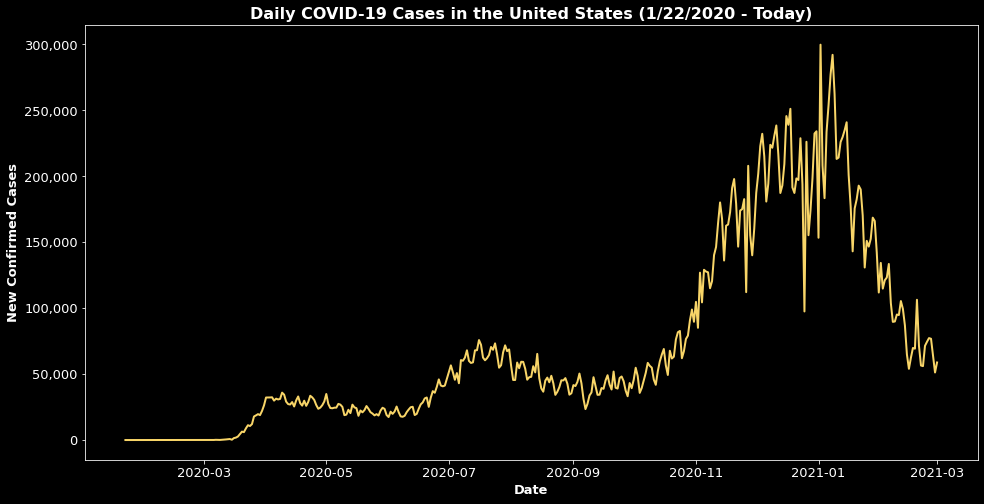

In [24]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(us_covid['Date'],
         us_covid['Daily Cases'],
         color = '#f8d568',
         linestyle = 'solid',
         linewidth = 2)

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Daily COVID-19 Cases in the United States (1/22/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

### Time Series of Daily Cases/Deaths in Harris County, Texas

As I said from the previous section, I am going to be focusing on a specific county and state within the `county` data set and those are Harris County and Texas. Which again I would have to subset the data of 1,079,469 instances and narrow it down to a small dataframe.

Beautiful! Now, we have the time series of daily cases for Harris County, Texas. Few months ago, specifically around mid-September, I remember the news was talking about putting the state thru another lockdown due to the high number of cases increasing which seems about right looking at the graph.

In [25]:
harris_county = county[(county['county'] == 'Harris') & (county['state'] == 'Texas')]
harris_county

,date,county,state,cases,deaths,Daily Cases,Daily Deaths,County State
573,2020-03-05,Harris,Texas,4,0.0,0,0,"Harris, Texas"
642,2020-03-06,Harris,Texas,5,0.0,1,0,"Harris, Texas"
734,2020-03-07,Harris,Texas,5,0.0,0,0,"Harris, Texas"
846,2020-03-08,Harris,Texas,6,0.0,1,0,"Harris, Texas"
976,2020-03-09,Harris,Texas,6,0.0,0,0,"Harris, Texas"
...,...,...,...,...,...,...,...,...
1065963,2021-02-25,Harris,Texas,344898,4980.0,796,47,"Harris, Texas"
1069208,2021-02-26,Harris,Texas,348125,5019.0,3227,39,"Harris, Texas"
1072454,2021-02-27,Harris,Texas,348848,5041.0,723,22,"Harris, Texas"
1075700,2021-02-28,Harris,Texas,350201,5075.0,1353,34,"Harris, Texas"


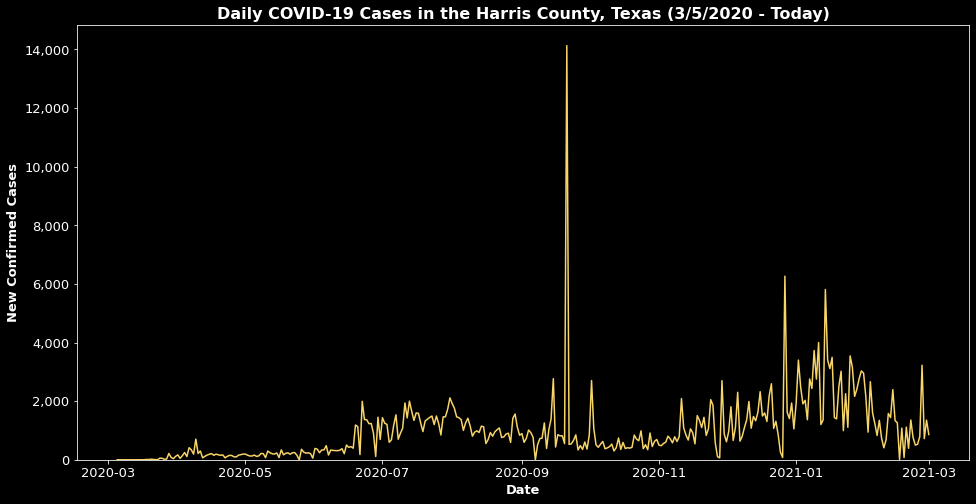

In [26]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(harris_county['date'],
         harris_county['Daily Cases'],
         color = '#f8d568',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)

plt.title(label = 'Daily COVID-19 Cases in the Harris County, Texas (3/5/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

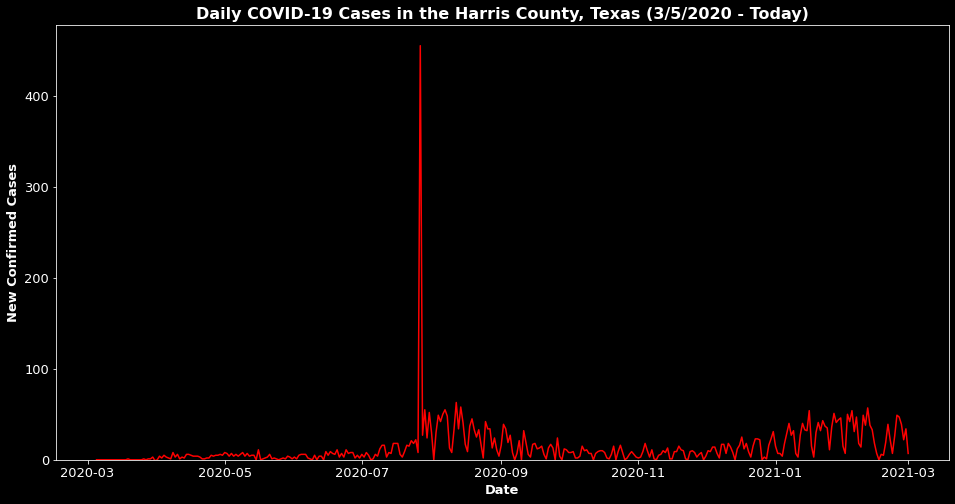

In [27]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize= (16, 8))

plt.plot(harris_county['date'],
         harris_county['Daily Deaths'],
         color = 'red',
         linestyle = 'solid')

plt.xticks(fontsize = 13)
plt.xlabel(xlabel = 'Date', fontsize = 13, fontweight = 'bold')

plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'New Confirmed Cases', fontsize = 13, fontweight = 'bold')
plt.ylim(0)



plt.title(label = 'Daily COVID-19 Cases in the Harris County, Texas (3/5/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

### The Top 10 Number of Cases/Deaths of Counties in Texas

In [28]:
top_tx_counties = (county[(county['state'] == 'Texas')]
                   .groupby(by = ['county'], as_index = False)
                   .agg({'cases': ['max']})
                   .nlargest(10, columns = [('cases', 'max')])
                   .reset_index(drop = True))
top_tx_counties

,county,cases
,,max
0,Harris,351063
1,Dallas,281155
2,Tarrant,242638
3,Bexar,196828
4,El Paso,123979
5,Collin,83404
6,Hidalgo,77312
7,Travis,75901
8,Denton,64697


In [29]:
top_tx_counties_deaths = (county[(county['state'] == 'Texas')]
                          .groupby(by = ['county'], as_index = False)
                          .agg({'deaths': ['max']})
                          .nlargest(10, columns = [('deaths', 'max')])
                          .reset_index(drop = True))
top_tx_counties_deaths

,county,deaths
,,max
0,Harris,5082.0
1,Dallas,3425.0
2,Bexar,2897.0
3,Tarrant,2883.0
4,Hidalgo,2638.0
5,El Paso,2354.0
6,Cameron,1471.0
7,Travis,852.0
8,Webb,780.0


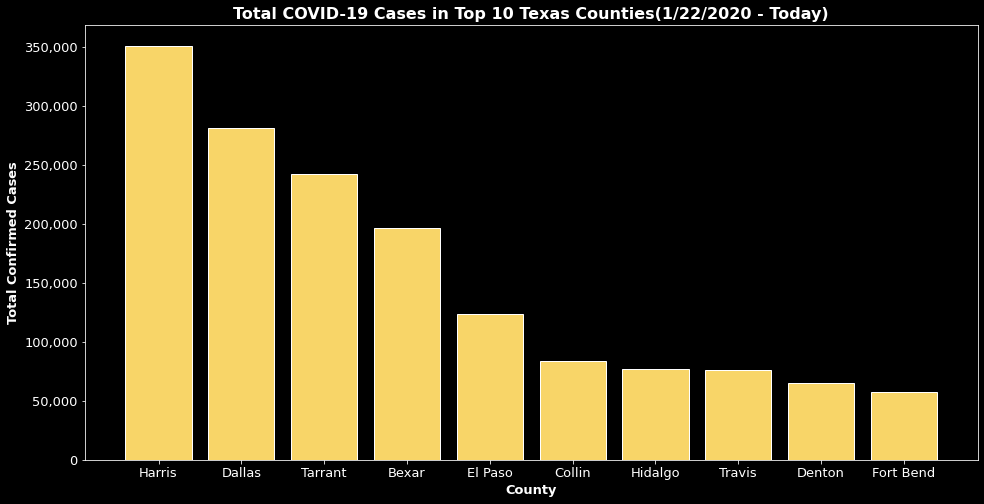

In [30]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_tx_counties[('county', '')],
        top_tx_counties[('cases', 'max')],
        color = '#f8d568',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Cases', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Total COVID-19 Cases in Top 10 Texas Counties(1/22/2020 - Today)',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

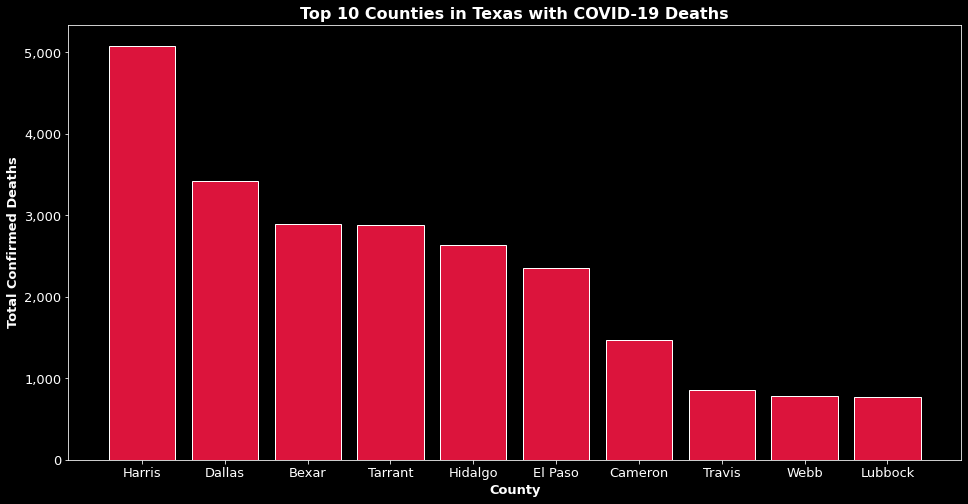

In [31]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_tx_counties_deaths[('county', '')],
        top_tx_counties_deaths[('deaths', 'max')],
        color = 'crimson',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white')
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 Counties in Texas with COVID-19 Deaths',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

In [32]:
top_states_cases = (county.groupby(by = ['County State'], as_index = False)
                   .agg({'cases': ['max']})
                   .nlargest(10, columns = [('cases', 'max')])
                   .reset_index(drop = True))
top_states_cases

,County State,cases
,,max
0,"Los Angeles, California",1193531
1,"New York City, New York",728859
2,"Maricopa, Arizona",511055
3,"Cook, Illinois",474885
4,"Miami-Dade, Florida",410951
5,"Harris, Texas",351063
6,"Riverside, California",289773
7,"San Bernardino, California",286755
8,"Dallas, Texas",281155


In [33]:
top_states_deaths = (county.groupby(by = ['County State'], as_index = False)
                    .agg({'deaths': ['max']})
                    .nlargest(10, columns = [('deaths', 'max')])
                    .reset_index(drop = True))
top_states_deaths

,County State,deaths
,,max
0,"New York City, New York",29408.0
1,"Los Angeles, California",21467.0
2,"Cook, Illinois",9924.0
3,"Maricopa, Arizona",9117.0
4,"Miami-Dade, Florida",5449.0
5,"Harris, Texas",5082.0
6,"Wayne, Michigan",4145.0
7,"Orange, California",3921.0
8,"Clark, Nevada",3861.0


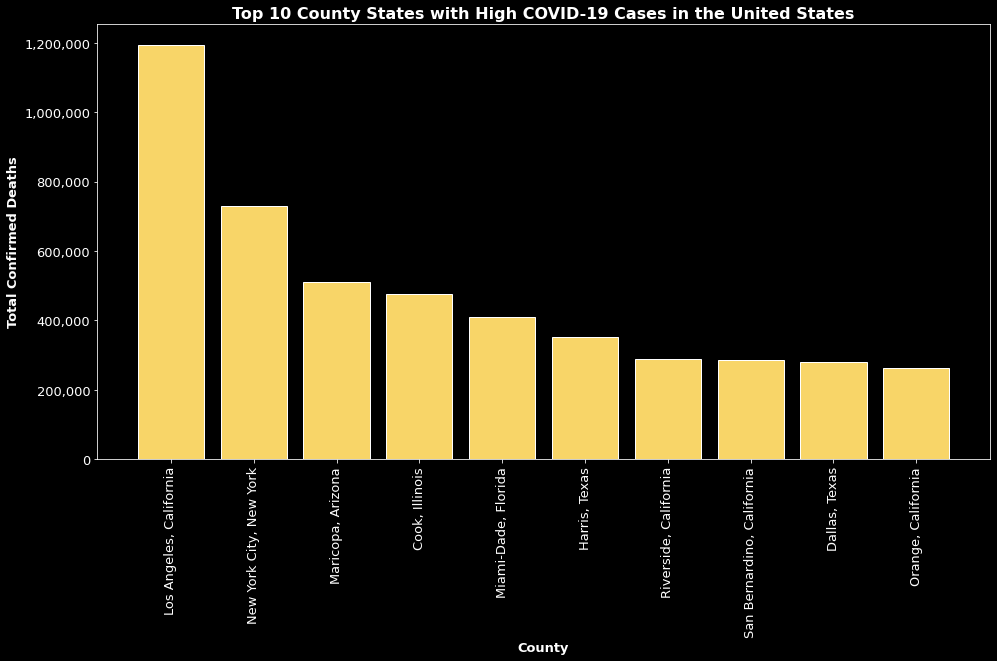

In [34]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_states_cases[('County State', '')],
        top_states_cases[('cases', 'max')],
        color = '#f8d568',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 County States with High COVID-19 Cases in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

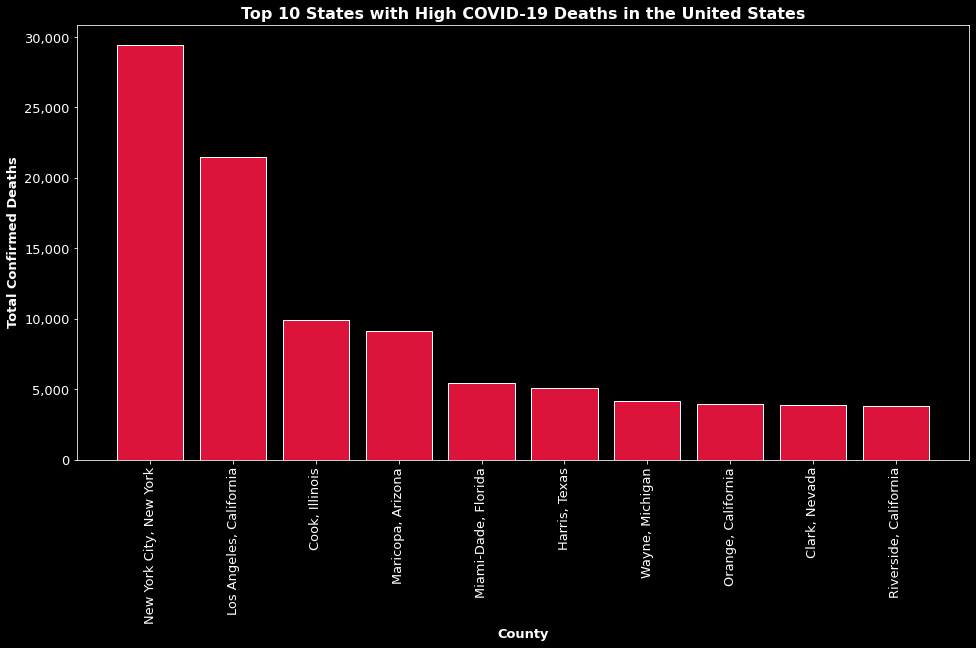

In [35]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(top_states_deaths[('County State', '')],
        top_states_deaths[('deaths', 'max')],
        color = 'crimson',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 States with High COVID-19 Deaths in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

In [36]:
states_cases = (county.groupby(by = ['state'], as_index = False)
                   .agg({'cases': ['max'], 'deaths': ['max']})
                   .nlargest(10, columns = [('cases', 'max'), ('deaths', 'max')])
                   .reset_index(drop = True))
states_cases

,state,cases,deaths
,,max,max
0,California,1193531,21467.0
1,New York,728859,29408.0
2,Arizona,511055,9117.0
3,Illinois,474885,9924.0
4,Florida,410951,5449.0
5,Texas,351063,5082.0
6,Nevada,226871,3861.0
7,Utah,138773,767.0
8,Pennsylvania,118594,3139.0


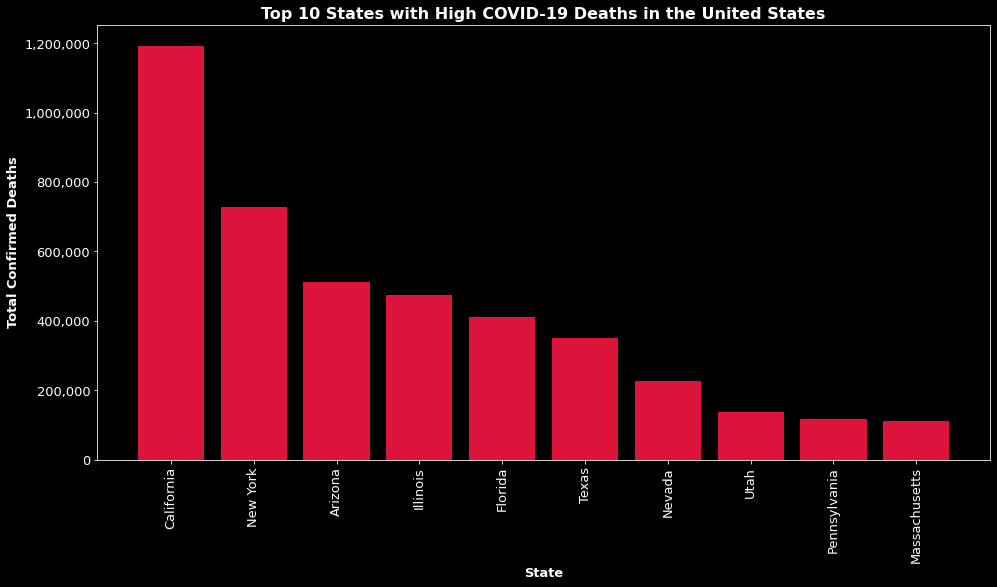

In [37]:
fig, ax = plt.subplots(figsize = (16, 8))

ax.bar(states_cases[('state', '')],
        states_cases[('deaths', 'max')], color = 'yellow')

ax.bar(states_cases[('state', '')],
        states_cases[('cases', 'max')], color = 'crimson')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'State', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 States with High COVID-19 Deaths in the United States',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

In [39]:
test1 = (county.groupby(by = ['state'], as_index = False)
         .sum()
         .drop(['cases', 'deaths'], axis = 1))

In [40]:
test1.columns = ['State', 'Total Cases', 'Total Deaths']

In [41]:
test1['Death/Cases ratio (%)'] = round((test1['Total Deaths']/test1['Total Cases']) * 100, 3)

In [42]:
test1.head()

,State,Total Cases,Total Deaths,Death/Cases ratio (%)
0,Alabama,493686,9931,2.012
1,Alaska,58197,289,0.497
2,Arizona,818268,15976,1.952
3,Arkansas,322401,5250,1.628
4,California,3573107,52488,1.469


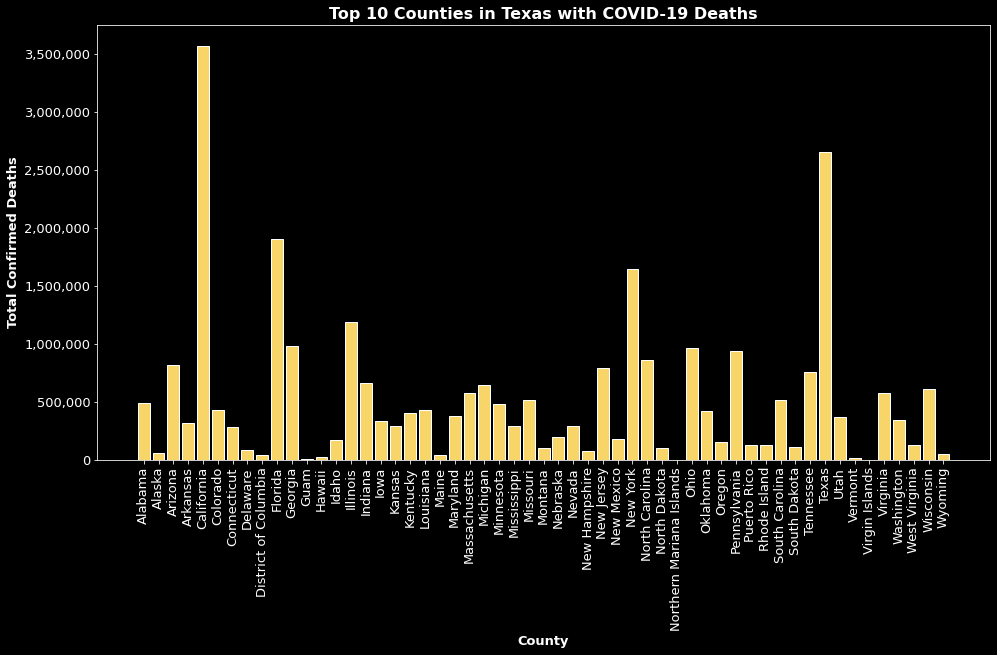

In [43]:
fig, ax = plt.subplots(figsize= (16, 8))

plt.bar(test1['State'],
        test1['Total Cases'],
        color = '#f8d568',
        edgecolor = 'white')

plt.xticks(fontsize = 13, color = 'white', rotation = 90)
plt.xlabel(xlabel = 'County', fontsize = 13, fontweight = 'bold', color = 'white')

plt.yticks(fontsize = 13, color = 'white')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel(ylabel = 'Total Confirmed Deaths', fontsize = 13, fontweight = 'bold', color = 'white')

plt.title(label = 'Top 10 Counties in Texas with COVID-19 Deaths',
          fontsize = 16,
          fontweight = 'bold',
          color = 'white')
plt.show()

# Quick Forcasting

In [ ]:
us_covid.head()

In [ ]:
us_covid = us_covid.drop(['Country/Region', 'Cases'], axis = 1)

In [ ]:
us_covid.columns = ['ds', 'y']

In [ ]:
us_covid

In [ ]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(us_covid)

In [ ]:
future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast = m.predict(future)
forecast.head()

In [ ]:
forecast[['ds', 'yhat']]

In [ ]:
sns.set_style('white')
plot1 = m.plot(forecast)

In [ ]:
plot2 = m.plot_components(forecast)

In [ ]:
harris_county = harris_county.drop(['county', 'state', 'fips', 'cases', 'deaths', 'County State', 'Daily Deaths'], axis =1)

In [ ]:
harris_county.columns = ['ds', 'y']

In [ ]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(harris_county)

In [ ]:
future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast = m.predict(future)
forecast.head()

In [ ]:
plot3 = m.plot(forecast)

In [ ]:
plot4 = m.plot_components(forecast)